# Importation des packages

In [1]:
pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 460kB 52.7MB/s 
     |████████████████████████████████| 2.9MB 33.6MB/s 
     |████████████████████████████████| 3.0MB 41.0MB/s 
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [2]:
pip install keras==2.4.3

In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0


### Importation des packages généraux

In [4]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import random
import IPython
import datetime
import librosa
import matplotlib.font_manager as fm
import seaborn as sn
from matplotlib.collections import QuadMesh

### Importation de Keras

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
%load_ext tensorboard
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

## Connexion au drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
PATH = "drive/MyDrive/Projet Cassiopée/Programmes/Dataset/"

# Classification audio

## Chargement des données

Les données sont sauvegardées dans un fichier grâce au code dans Chargement données et récupérer ici.

In [8]:
sauvegarde = np.load("drive/MyDrive/Projet Cassiopée/Programmes/Steve/donnée.npy", allow_pickle=True)
D = sauvegarde[0]
label = sauvegarde[1]
path_donnee = sauvegarde[2]

## Entrainement

On définit la taille des données en entrée. A modifier selon le temps pris en compte pour l'entrée.

In [11]:
#Input shape of the data for the CNN
input_shape=(128, 128, 1)

In [12]:
# On récupère les données sous format d'array pour faciliter l'entrainement
x = np.array(D)
y = np.array([np.array(x) for x in label])

# On sépare les données entre données de test et données d'entrainement
x_train, x_validation, y_train, y_validation = train_test_split(x, y, random_state = 1)
path_donnee_train, path_donnee_validation = train_test_split(path_donnee, random_state = 1)

# On reformat les données pour le CNN
x_train = np.array([x.reshape(input_shape) for x in x_train])
x_validation = np.array([x.reshape(input_shape) for x in x_validation])

### Création du modèle

In [13]:
# Définiton du modèle utilisé
model = Sequential()
model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=16, activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       2

### Compilation du modèle

In [14]:
#Compile le modèle
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

### Entrainement du modèle

In [16]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

BATCH_SIZE = 256
EPOCHS = 40

# Entraine le modèle
model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_validation, y_validation),
    callbacks=[tensorboard_callback],
)

Epoch 1/40
45/45 [==============================] - 66s 1s/step - loss: 0.4986 - accuracy: 0.2861 - val_loss: 0.2140 - val_accuracy: 0.3645
Epoch 2/40
45/45 [==============================] - 50s 1s/step - loss: 0.1760 - accuracy: 0.4875 - val_loss: 0.1510 - val_accuracy: 0.5956
Epoch 3/40
45/45 [==============================] - 50s 1s/step - loss: 0.1377 - accuracy: 0.6132 - val_loss: 0.1261 - val_accuracy: 0.6692
Epoch 4/40
45/45 [==============================] - 51s 1s/step - loss: 0.1175 - accuracy: 0.6896 - val_loss: 0.1070 - val_accuracy: 0.7352
Epoch 5/40
45/45 [==============================] - 51s 1s/step - loss: 0.1030 - accuracy: 0.7357 - val_loss: 0.0976 - val_accuracy: 0.7399
Epoch 6/40
45/45 [==============================] - 51s 1s/step - loss: 0.0894 - accuracy: 0.7717 - val_loss: 0.0858 - val_accuracy: 0.7883
Epoch 7/40
45/45 [==============================] - 51s 1s/step - loss: 0.0772 - accuracy: 0.8067 - val_loss: 0.0772 - val_accuracy: 0.8138
Epoch 8/40
45/45 [==

In [15]:
# Sauvegarde le modèle pour une utilisation sur la Rasberry

tf.keras.models.save_model(model,'drive/MyDrive/Projet Cassiopée/Programmes/Steve/model_simplifier1')

#joblib.dump(model, "drive/MyDrive/Projet Cassiopée/Programmes/Steve/model_simplifier_5.pkl")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drive/MyDrive/Projet Cassiopée/Programmes/Steve/model_simplifier1/assets


### Evaluation du modèle

L'evaluation du modèle se fait par en prennant un seuil de détection. Si la probabilité de présence est supérieur au seuil, le son est considérer comme présent. On évalue ensuite la précision du modèle grâce à la connaissance du son fournit en entrée.

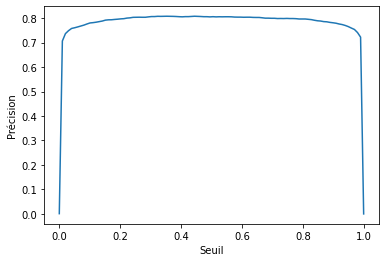

In [18]:
seuils = np.linspace(0, 1, 100) # Les différents seuils pris
accuracies = [] # La liste des précisions pour les différents seuils
probabilite = model.predict(x_validation) # La liste des probabilités pour chaque son d'appartenir à une classe
for seuil in seuils :
  tet = (probabilite > seuil)
  accuracies.append(accuracy_score(y_validation, tet))
plt.xlabel('Seuil')
plt.ylabel('Précision')
plt.plot(seuils, accuracies)

### Visualisation des résultats

In [20]:
# Les classes données en entrée
classes = np.array(["Coup par coups", "Explosion", "Gros calibre", "Petit calibre", "Chenille", "Bateau", "Camion", "Groupe éléctrogène", "Moto", "Quad", "Voiture", "Cris", "Discussion calme", "Enfant", "Femme", "Homme"])

# L'élément prédit
element = 9

# On récupère les 5 éléments dont la probabilité est la plus élevée
proba_triee = np.argsort(probabilite[element])[:-6:-1]

for i in range(5):
  print(classes[proba_triee[i]] + "(" + str(probabilite[element][proba_triee[i]]) + ")")

#On affiche la source du fichier pour connaitre sa classe
print("La classe : " + path_donnee_validation[element])

# On écoute le son
IPython.display.display(IPython.display.Audio(PATH + "sound/" + path_donnee_validation[element] + ".wav"))

Discussion calme(0.99999964)
Femme(0.0041842046)
Homme(0.00027841507)
Enfant(3.2364653e-06)
Chenille(6.8040904e-08)
La classe : Voix/Discussion calme/french conversation - dialogues en français 195


In [21]:
# L'élément prédit
element = 7

# On récupère les 5 éléments dont la probabilité est la plus élevée
proba_triee = np.argsort(probabilite[element])[:-6:-1]

for i in range(5):
  print(classes[proba_triee[i]] + "(" + str(probabilite[element][proba_triee[i]]) + ")")

#On affiche la source du fichier pour connaitre sa classe
print("La classe : " + path_donnee_validation[element])

# On écoute le son
IPython.display.display(IPython.display.Audio(PATH + "sound/" + path_donnee_validation[element] + ".wav"))

Voiture(0.9999534)
Camion(0.04314369)
Moto(1.3739291e-05)
Bateau(7.11731e-08)
Enfant(7.0902246e-08)
La classe : Moteurs/Camion/Best of Scania V8 open pipes Sound 2017 4K UHD 11


In [22]:
# L'élément prédit
element = 2

# On récupère les 5 éléments dont la probabilité est la plus élevée
proba_triee = np.argsort(probabilite[element])[:-6:-1]

for i in range(5):
  print(classes[proba_triee[i]] + "(" + str(probabilite[element][proba_triee[i]]) + ")")

#On affiche la source du fichier pour connaitre sa classe
print("La classe : " + path_donnee_validation[element])

# On écoute le son
IPython.display.display(IPython.display.Audio(PATH + "sound/" + path_donnee_validation[element] + ".wav"))

Camion(1.0)
Voiture(1.1983309e-06)
Enfant(1.0435784e-08)
Bateau(1.813298e-09)
Discussion calme(1.5271437e-11)
La classe : Moteurs/Camion/Loud Truck Compilation 2 72


In [23]:
element = 3

proba_triee = np.argsort(probabilite[element])[:-6:-1]
for i in range(5):
  print(classes[proba_triee[i]] + "(" + str(probabilite[element][proba_triee[i]]) + ")")
print("La classe : " + path_donnee_validation[element])

# On écoute le son
IPython.display.display(IPython.display.Audio(PATH + "sound/" + path_donnee_validation[element] + ".wav"))

Moto(0.9986731)
Quad(1.8682455e-05)
Bateau(5.735705e-06)
Voiture(2.6359183e-07)
Cris(1.4336831e-07)
La classe : Moteurs/Moto/2020 BEST RAW 4 STROKE COMPILATION 72


# Test sur vidéo

Permet de tester sur une vidéo entière le modèle pour évaluer la performance. La classification s'éffectue lorsque le niveau sonore dépasse le seuil prédéfinie et enregistre une secton de 5 sec pour la classifier.

In [ ]:
results = []
i = 0
temps = []
y, sr = librosa.core.load("drive/MyDrive/Projet Cassiopée/Programmes/Steve/Le meilleur du Monde de Jamy - Comment se forment les bouchons .wav", res_type="kaiser_fast")
while i<=len(y)//sr :
  if len(np.where(y[i*sr:(i+1)*sr]>0.1)[0]) != 0:
    ps = librosa.feature.melspectrogram(y=y[i*sr:(i+3)*sr], sr=sr)
    ps = ps[:,:128]
    ps = ps.reshape(128, 128, 1) 
    probabilite = model.predict(np.array(ps, ndmin=4))
    results.append(probabilite[0])
    i = i + 3
    temps.append(i)
  else :
    results.append(np.array(16*[0]))
    i = i + 1
    temps.append(i)
results = np.array(results)

In [ ]:
Classe_a_afficher = "Tout" #@param ["Coup par coups", "Explosion", "Gros calibre", "Petit calibre", "Rafale", "Chenille", "Bateau", "Camion", "Groupe éléctrogène", "Moto", "Quad", "Voiture", "Cris", "Discussion calme", "Enfant", "Femme", "Homme", "Tout"]

plt.figure(figsize=(20, 8))
if Classe_a_afficher== 'Tout':
  for i in range(len(classes)) :
    if len(np.where(results[:,i]>0.7)[0])!=0:
      plt.plot(temps, results[:,i], label=classes[i])
  plt.legend()
  plt.show()
else :
  i = np.where(classes==Classe_a_afficher)[0]
  plt.plot(temps, results[:,i], label=Classe_a_afficher)
  plt.legend()
  plt.xlabel("Temps",fontsize=18)
  plt.ylabel("Niveau de confiance",fontsize=18)
  plt.ylim(0, 1)
  plt.show()